In [1]:
### Grupo 9 ####

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 75%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 65%; }a
</style>
"""))

In [2]:
#1.0 Importar librerías
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import pyreadr
import collections
import warnings
warnings.filterwarnings('ignore')

In [3]:
#2.0 Cargar dataset
data = pyreadr.read_r( r"../../data/wage2015_subsample_inference.Rdata")
data = data[ 'data' ] 
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


### 1. En gráfico muestre el histograma de frecuencias absolutas del salario y , en otro gráfico, el histograma del logaritmo del salario. Comente las diferencias y por qué.

Text(0.04, 0.02, 'Elaboración en base al RData')

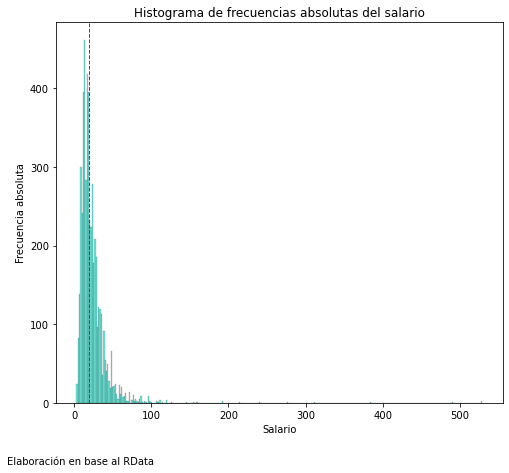

In [4]:
#Tamaño del gráfico
fig, ax = plt.subplots( figsize=(8,7) )
#Graficar histograma
sns.histplot(data['wage'], color = '#40E0D0')
plt.axvline(data['wage'].median(), color='red', linestyle='dashed', linewidth=1) ##ver mediana de wage

#Título al gráfico
plt.title('Histograma de frecuencias absolutas del salario')

# función labels para alterar las etiquetas de los ejes
plt.xlabel('Salario')
plt.ylabel('Frecuencia absoluta')

#nota del fuente 
txt="Elaboración en base al RData"   
plt.figtext(0.04, 0.02, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10) # ubicación de la nota de fuente 

Text(0.04, 0.02, 'Elaboración en base al RData')

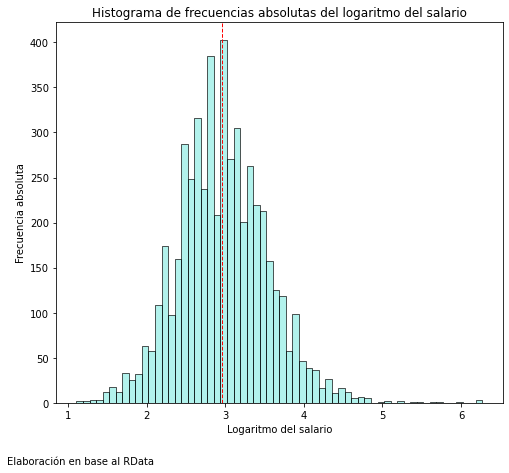

In [5]:
#Tamaño del gráfico
fig, ax = plt.subplots( figsize=(8,7) )
#Graficar histograma
sns.histplot(data['lwage'], color = '#40E0D0',alpha=0.4)
plt.axvline(data['lwage'].median(), color='red', linestyle='dashed', linewidth=1) #ver mediana de lwage

#Título al gráfico
plt.title('Histograma de frecuencias absolutas del logaritmo del salario')

# función labels para alterar las etiquetas de los ejes
plt.xlabel('Logaritmo del salario')
plt.ylabel('Frecuencia absoluta')

#nota del fuente 
txt="Elaboración en base al RData"   
plt.figtext(0.04, 0.02, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10) # ubicación de la nota de fuente 

#### Se cambia la variable a logaritmo ya que se trata de escoger una transformación que conduzca a una distribución simétrica, y más cercana a la normal. Para distribuciones asimétricas positivas (frecuencias altas hacia el lado izquierdo de la distribución), se suele usar el logaritmo, pues comprime los valores altos y expande los pequeños. Tal sería el caso del primer gráfico, ya que claramente se observa una asimetría asimétrica positiva más fuerte porque existen valores que se distancian considerablemente de la media del salario así como también la transformación reduce los valores altos de la frecuencia en el primer caso.

### 2. En una sola imagen, el gráfico de densidad del logaritmo del salario por hora de las mujeres que terminaron la universidad y el caso de los hombres.

In [6]:
# Filtrar a las personas que terminaron la universidad
data_univ = data[data.clg.isin([1])|data.ad.isin([1])]

# Variables relevantes 
data_univ = data_univ[["lwage", "sex"]]
data_h_m=pd.DataFrame()

# Renombrar las columnas
data_h_m = data_univ.pivot(columns='sex',values='lwage')
data_h_m.columns =['mujer','hombre'] 


Text(0.5, 0, 'lwage by sex')

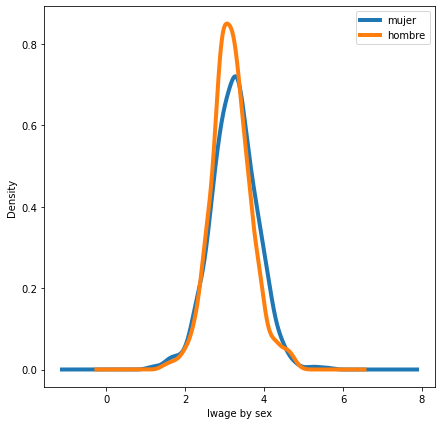

In [7]:
# Graficar la distribución de lwage por sexo
data_h_m.plot.density(figsize = (7, 7), linewidth = 4) 
  
plt.xlabel("lwage by sex")

### 3. En un gráfico Pie, muestre el porcentaje de personas según nivel educativo.

In [8]:
# shs: Si la persona tiene secundaria incompleta (Some high school)
# shg: secundaria completa (High schoool graduate)
# scl: Universitaria incompleta (Some college)
# clg: Universitaria completa (College gratuate)
# ad: Grado educativo avanzado (Advanced degree - master or Phd)
data['educ']= data['shs']*0 + data['hsg']*2 + data['scl']*3 + data['clg']*4 + data['ad']*5 
base = data.groupby([ 'educ' ]).count()

In [9]:
base

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
educ,,,,,,,,,,,,,,,,,,,,
0.0,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
2.0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
3.0,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
4.0,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636
5.0,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706,706


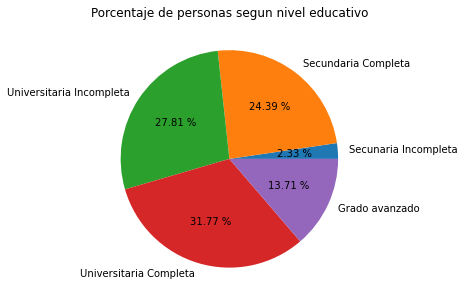

In [10]:
labels=['Secunaria Incompleta','Secundaria Completa' , 'Universitaria Incompleta', 
        'Universitaria Completa', 'Grado avanzado']

plt.figure(figsize=(5,5))

ax = plt.pie(base['hsg'], labels =labels,  autopct='%.2f %%')
plt.title('Porcentaje de personas segun nivel educativo')
plt.show()

### 4. En un gráfico, muestre el diagrama de cajas (box - plot) del logaritmo del salario por hora de las personas con el mayor nivel educativo (ad) según genero. 
Nótese que el gráfico debe contener dos box-plot uno para los hombres y otro para las mujeres

In [11]:
filtro_ad=data[data['ad'] == 1 ]
filtro_ad  #solo los individuos con maximo nivel educativo

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,educ
rownames,,,,,,,,,,,,,,,,,,,,,
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12,5.0
145,17.788462,2.878550,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,11.0,1.21,1.331,1.4641,2310,8,7860,17,5.0
191,42.307692,3.744969,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.00,0.000,0.0000,4700,16,4795,9,5.0
219,14.053254,2.642854,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,14.0,1.96,2.744,3.8416,2330,8,7860,17,5.0
229,16.272189,2.789457,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,28.0,7.84,21.952,61.4656,4610,15,8290,18,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,24.475524,3.197674,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,24.0,5.76,13.824,33.1776,2310,8,7860,17,5.0
32565,35.256410,3.562647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,0.36,0.216,0.1296,2320,8,7860,17,5.0
32591,19.711538,2.981204,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.0,0.64,0.512,0.4096,2000,6,8090,18,5.0


[Text(0, 0, 'Hombre'), Text(1, 0, 'Mujer')]

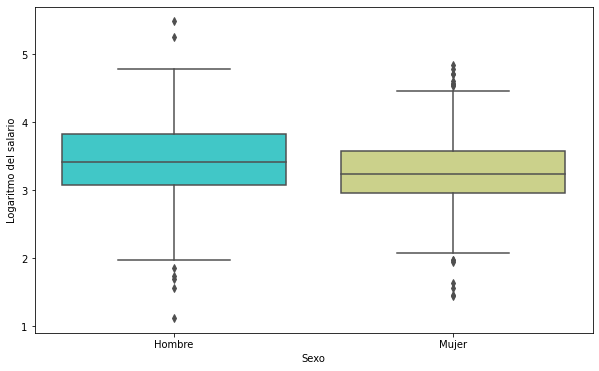

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
box = sns.boxplot(data=filtro_ad, x='sex', y="lwage", palette ="rainbow")
plt.xlabel('Sexo')
plt.ylabel('Logaritmo del salario')
(box.set_xticklabels([ "Hombre", "Mujer"]))
